In [ ]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from math import cos,sin,pi
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [ ]:
def cost(x , y):
  return x**2 - 10* y* cos(0.2* pi * x) + y**2 - 15* x* cos(0.4* pi *y)

def new_point(x, y,step,step_max):
    delta_x = step*30/step_max
    x = -delta_x /2 + random.random_sample()*delta_x/2
    delta_y = step*30/step_max
    x = -delta_y /2 + random.random_sample()*delta_y/2
    if(abs(x) > 15):
      x = x * 15/abs(x)
    if(abs(y) > 15):
      y = y * 15/abs(y)
    return x ,y

def good_enough(cost_, new_cost, temp):
  if (new_cost <= cost_):
    return True
  else :
    return np.exp(-(new_cost-cost_)/temp) > random.random()

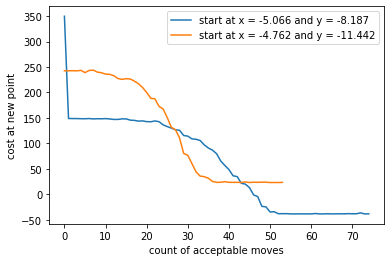

In [ ]:
def annealing(steps = 800):
  x,y = random.uniform(low=-15,high = 15,size=(2,1))
  cost_vals =[cost(x,y)]
  for i in range(steps):
    temp = max(0.01 , (steps - i)/steps)
    x_temp, y_temp = new_point(x[-1], y[-1], i, steps)
    cost_temp = cost(x_temp, y_temp)
    if(good_enough(cost_vals[-1], cost_temp, temp)):
      x, y = np.append(x, x_temp), np.append(y, y_temp)
      cost_vals.append(cost_temp)

  return x,y,cost_vals

x,y,c = annealing()
x1,y1,c1 = annealing()

plt.plot(range(len(c)), c, label = "start at x = {} and y = {}".format(round(x[-1],3),round(y[-1],3)))
plt.plot(range(len(c1)), c1, label = "start at x = {} and y = {}".format(round(x1[-1],3),round(y1[-1],3)))
plt.xlabel("count of acceptable moves")
plt.ylabel("cost at new point")
plt.legend()
plt.show()
